In [1]:
!head -500 turnstile_160109.txt > turnstile_160109_test.txt
from datetime import datetime, date, time
import pandas as pd
import csv
import pandas as pd
from pprint import pprint
import requests

In [63]:
r = requests.get("http://web.mta.info/developers/data/nyct/turnstile/turnstile_150502.txt")

In [65]:
testpd = pd.read_csv(r)

IOError: Expected file path name or file-like object, got <class 'requests.models.Response'> type

In [60]:
rdf = pd.read_csv(r, header=0)

IOError: Expected file path name or file-like object, got <class 'requests.models.Response'> type

In [12]:



with open('geocoded.csv') as f:
    reader = csv.reader(f)
    rows = [[cell.strip() for cell in row] for row in reader]

stations,lat,lon,CA,unit = [],[],[],[],[]
station_geo = dict()
for lines in rows:
    CA.append(lines[1])
    unit.append(lines[0])
    lat.append(lines[5])
    lon.append(lines[6])
    stations.append(lines[2])
    station_geo[lines[2]] = [lines[5],lines[6]]


In [3]:
!head -500 turnstile_160109.txt > turnstile_160109_test.txt
df = pd.read_csv('turnstile_160109.txt', header=0)

In [23]:
keys = zip(df["C/A"],df["UNIT"],df["SCP"],df["STATION"])
datetimes = pd.to_datetime(df["DATE"]+df["TIME"],format="%m/%d/%Y%H:%M:%S")
values = zip(datetimes, df["ENTRIES"])

df.head()
#challenge 2
d = dict()
for i, key in enumerate(keys):
    if key in d.keys():
        d[key].append(values[i])
    else:
        d[key] = [values[i]]

# pprint (d.items()[0:3])
ndf = pd.DataFrame.from_dict(d,orient='index')
ndf.head()
#challenge 3
nd = dict()
final_dict = dict()
for k,v in d.items():
    nd = dict()
    for val in v:
        date = datetime.date(val[0])
        if date in nd.keys():
            nd[date].append(val[1])
        else:
            nd[date] = [val[1]]
    nnd = dict()
    
    sorted_list = sorted(nd.items())
#     print sorted_list
    for i in range(len(sorted_list)):
        date = sorted_list[i][0]
        daycount = sorted_list[i][1]
#         print date
#         print(len(sorted_list))
#         print max(daycount)
        if i != len(sorted_list)-1:
            nextdaycount = sorted_list[i+1][1]
#             print nextdaycount
            difference = nextdaycount[0] -  min(daycount)
#             print daycount,nextdaycount
        else:
#             print max[daycount]
            difference = max(daycount) - min(daycount)
        nnd[date] = difference
    datesum = nnd.items()
    final_dict[k] = datesum
# pprint (final_dict)


data = pd.DataFrame.from_dict(final_dict,orient='index')


In [24]:
for k, v in final_dict.items():
    final_dict[k] = sorted(v)

In [25]:
for k,v in final_dict.items():
    print k,v
    break

('N134', 'R385', '00-00-00', 'ROCKAWAY BLVD') [(datetime.date(2016, 1, 2), 198), (datetime.date(2016, 1, 3), 257), (datetime.date(2016, 1, 4), 1240), (datetime.date(2016, 1, 5), 1388), (datetime.date(2016, 1, 6), 1337), (datetime.date(2016, 1, 7), 1396), (datetime.date(2016, 1, 8), 1259)]


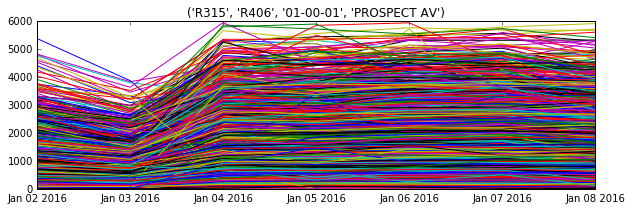

In [7]:
%matplotlib inline
# This will make your matplotlib graphs integrate nicely with the notebook. To plot the time series, import matplotlib with

import matplotlib.pyplot as plt
# Take the list of [(date1, count1), (date2, count2), ...], for the turnstile and turn it into two lists: dates and counts. This should plot it:



plt.figure(figsize=(10,3))
extreme = []
highs = []
min_extreme = []
for k,v in final_dict.items():
    t = zip(*list(v))
    dates, counts = t[0], t[1]
    if max(counts) > 5*10**4:
        extreme.append(tuple([k,v]))
    elif min(counts) < 0:
        min_extreme.append(tuple([k,v]))
    elif max(counts) > 6000:
        highs.append(tuple([k,v]))
    else:
        plt.title(k)
        plt.plot(dates,counts)
#     break
plt.show()

In [8]:
extreme

[(('H003', 'R163', '01-00-02', '6 AV'),
  [(datetime.date(2016, 1, 2), 1755),
   (datetime.date(2016, 1, 3), 1325),
   (datetime.date(2016, 1, 4), 2528),
   (datetime.date(2016, 1, 5), 1212628005),
   (datetime.date(2016, 1, 6), -117),
   (datetime.date(2016, 1, 7), -103),
   (datetime.date(2016, 1, 8), 2610)]),
 (('N062A', 'R010', '00-05-01', '42 ST-PORT AUTH'),
  [(datetime.date(2016, 1, 2), 1215),
   (datetime.date(2016, 1, 3), 885),
   (datetime.date(2016, 1, 4), 1788),
   (datetime.date(2016, 1, 5), 1846),
   (datetime.date(2016, 1, 6), 83604592),
   (datetime.date(2016, 1, 7), 1263),
   (datetime.date(2016, 1, 8), 1663)]),
 (('N071', 'R013', '00-00-00', '34 ST-PENN STA'),
  [(datetime.date(2016, 1, 2), 670),
   (datetime.date(2016, 1, 3), 562),
   (datetime.date(2016, 1, 4), 981),
   (datetime.date(2016, 1, 5), 3145219),
   (datetime.date(2016, 1, 6), 949),
   (datetime.date(2016, 1, 7), 956),
   (datetime.date(2016, 1, 8), 891)]),
 (('JFK03', 'R536', '00-00-05', 'SUTPHIN-ARCHER'

In [9]:
min_extreme

[(('N111', 'R284', '00-06-01', 'CLINTON-WASH AV'),
  [(datetime.date(2016, 1, 2), -28),
   (datetime.date(2016, 1, 3), -10),
   (datetime.date(2016, 1, 4), -5),
   (datetime.date(2016, 1, 5), -5),
   (datetime.date(2016, 1, 6), -2),
   (datetime.date(2016, 1, 7), -7),
   (datetime.date(2016, 1, 8), 1037)]),
 (('A025', 'R023', '01-03-02', '34 ST-HERALD SQ'),
  [(datetime.date(2016, 1, 2), -385),
   (datetime.date(2016, 1, 3), -116),
   (datetime.date(2016, 1, 4), -163),
   (datetime.date(2016, 1, 5), -221),
   (datetime.date(2016, 1, 6), -257),
   (datetime.date(2016, 1, 7), -282),
   (datetime.date(2016, 1, 8), 4278)]),
 (('R158', 'R084', '00-06-00', '59 ST COLUMBUS'),
  [(datetime.date(2016, 1, 2), -45),
   (datetime.date(2016, 1, 3), -23),
   (datetime.date(2016, 1, 4), -17),
   (datetime.date(2016, 1, 5), 758),
   (datetime.date(2016, 1, 6), 892),
   (datetime.date(2016, 1, 7), 822),
   (datetime.date(2016, 1, 8), 759)]),
 (('J034', 'R007', '00-00-02', '104 ST'),
  [(datetime.date(2

In [10]:
highs

[(('R238', 'R046', '00-00-06', 'GRD CNTRL-42 ST'),
  [(datetime.date(2016, 1, 2), 2261),
   (datetime.date(2016, 1, 3), 1554),
   (datetime.date(2016, 1, 4), 6502),
   (datetime.date(2016, 1, 5), 5570),
   (datetime.date(2016, 1, 6), 5809),
   (datetime.date(2016, 1, 7), 5885),
   (datetime.date(2016, 1, 8), 5439)]),
 (('R251', 'R144', '00-03-02', '96 ST'),
  [(datetime.date(2016, 1, 2), 868),
   (datetime.date(2016, 1, 3), 403),
   (datetime.date(2016, 1, 4), 5940),
   (datetime.date(2016, 1, 5), 6126),
   (datetime.date(2016, 1, 6), 6196),
   (datetime.date(2016, 1, 7), 6472),
   (datetime.date(2016, 1, 8), 5508)]),
 (('R238', 'R046', '00-03-02', 'GRD CNTRL-42 ST'),
  [(datetime.date(2016, 1, 2), 4180),
   (datetime.date(2016, 1, 3), 2972),
   (datetime.date(2016, 1, 4), 4562),
   (datetime.date(2016, 1, 5), 9651),
   (datetime.date(2016, 1, 6), 9539),
   (datetime.date(2016, 1, 7), 10033),
   (datetime.date(2016, 1, 8), 10021)]),
 (('R238', 'R046', '00-03-01', 'GRD CNTRL-42 ST'),
  

In [42]:
# v = pd.DataFrame.from_dict(final_dict)
filtered_dict = dict()
for k,v in final_dict.items():
    if len(v) == 7:
        filtered_dict[k] = v
# filtered_dict_df = pd.DataFrame.from_dict(filtered_dict)    
# v.head(n=7)


In [44]:
# filtered_dict_df.head()

In [89]:
ca_unit = zip(CA,unit)
geo_data = zip(stations,lat,lon,unit)
geo_pd = pd.DataFrame(geo_data, columns=['STATION', 'LAT', 'LON','UNIT'])
# geo_pd = geo_pd.drop_duplicates(subset="STATION")
# eg = type(geo_pd["ca_unit"][0])
# geo_pd[list(geo_pd["STATION"])[0]=="X002"]
# print tuple(X002, R470)
# geo_pd.head()

In [90]:
ndf = pd.read_csv('turnstile_160109.txt', header=0)

# ndf["ca_unit"] = zip(ndf["C/A"], ndf["UNIT"])
ndf.head()

,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS
0,A002,R051,02-00-00,59 ST,NQR456,BMT,01/02/2016,03:00:00,REGULAR,5478180,1849152
1,A002,R051,02-00-00,59 ST,NQR456,BMT,01/02/2016,07:00:00,REGULAR,5478183,1849161
2,A002,R051,02-00-00,59 ST,NQR456,BMT,01/02/2016,11:00:00,REGULAR,5478262,1849240
3,A002,R051,02-00-00,59 ST,NQR456,BMT,01/02/2016,15:00:00,REGULAR,5478519,1849340
4,A002,R051,02-00-00,59 ST,NQR456,BMT,01/02/2016,19:00:00,REGULAR,5478940,1849403


In [91]:
merged_geopd = pd.merge(ndf,geo_pd, how = 'outer', on="UNIT")

In [92]:
merged_geopd.drop_duplicates(subset="STATION_x")

,C/A,UNIT,SCP,STATION_x,LINENAME,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS,STATION_y,LAT,LON
0,A002,R051,02-00-00,59 ST,NQR456,BMT,01/02/2016,03:00:00,REGULAR,5478180,1849152,LEXINGTON AVE,40.762796,-73.967686
3711,A006,R079,00-00-00,5 AV/59 ST,NQR,BMT,01/02/2016,01:00:00,REGULAR,2029643,3582673,5 AVE-59 ST,40.764909,-73.973372
4887,A010,R080,00-00-00,57 ST-7 AV,NQR,BMT,01/02/2016,03:00:00,REGULAR,819097,389823,57 ST-7 AVE,40.764755,-73.980646
6097,A013,R081,01-00-00,49 ST,NQR,BMT,01/02/2016,03:00:00,REGULAR,5438310,32123751,49 ST-7 AVE,40.760139,-73.984112
9833,A021,R032,01-00-00,TIMES SQ-42 ST,ACENQRS1237,BMT,01/02/2016,03:00:00,REGULAR,5354424,6283875,42 ST-TIMES SQ,40.755905,-73.986504
14121,A022,R022,01-00-00,34 ST-HERALD SQ,BDFMNQR,BMT,01/02/2016,03:00:00,REGULAR,21112692,8243319,34 ST-HERALD SQ,40.749533,-73.987899
20108,A027,R082,01-00-00,28 ST,NR,BMT,01/02/2016,03:00:00,REGULAR,1668537,2065224,28 ST-BROADWAY,40.745574,-73.988682
20874,A030,R083,01-00-00,23 ST,NR,BMT,01/02/2016,03:00:00,REGULAR,5198505,3259682,23 ST-5 AVE,40.741006,-73.989315
22072,A033,R170,02-00-00,14 ST-UNION SQ,LNQR456,BMT,01/02/2016,00:00:00,REGULAR,1011324,2499742,14 ST-UNION SQ,40.734836,-73.990688
32488,A038,R085,00-00-00,8 ST-NYU,NR,BMT,01/02/2016,03:00:00,REGULAR,2039383,1564858,8 ST-B'WAY NYU,40.730348,-73.992705


In [94]:
filez = merged_geopd.to_csv()
f = open('geocord_added.csv','w')
f.write(filez)
f.close()

In [36]:
subset_merged_geopd = merged_geopd.drop_duplicates(subset="STATION_x")
zip(subset_merged_geopd.head(n=20)["STATION_x"],subset_merged_geopd.head(n=100)["STATION_y"])

[('59 ST', nan),
 ('5 AV/59 ST', '5 AVE-59 ST'),
 ('57 ST-7 AV', '57 ST-7 AVE'),
 ('49 ST', nan),
 ('TIMES SQ-42 ST', '42 ST-TIMES SQ'),
 ('34 ST-HERALD SQ', '34 ST-HERALD SQ'),
 ('28 ST', nan),
 ('23 ST', nan),
 ('14 ST-UNION SQ', nan),
 ('8 ST-NYU', "8 ST-B'WAY NYU"),
 ('PRINCE ST', "PRINCE ST-B'WAY"),
 ('CANAL ST', nan),
 ('CITY HALL', "MURRAY ST-B'WAY"),
 ('CORTLANDT ST', nan),
 ('RECTOR ST', nan),
 ('WHITEHALL S-FRY', nan),
 ('DELANCEY/ESSEX', 'ESSEX ST'),
 ('BOWERY', 'BOWERY'),
 ('CHAMBERS ST', nan),
 ('FULTON ST', nan)]

In [37]:
merged_geopd.head()

,C/A,UNIT,SCP,STATION_x,LINENAME,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS,ca_unit,STATION_y,LAT,LON
0,A002,R051,02-00-00,59 ST,NQR456,BMT,01/02/2016,03:00:00,REGULAR,5478180,1849152,"(A002, R051)",NaN,NaN,NaN
1,A002,R051,02-00-00,59 ST,NQR456,BMT,01/02/2016,07:00:00,REGULAR,5478183,1849161,"(A002, R051)",NaN,NaN,NaN
2,A002,R051,02-00-00,59 ST,NQR456,BMT,01/02/2016,11:00:00,REGULAR,5478262,1849240,"(A002, R051)",NaN,NaN,NaN
3,A002,R051,02-00-00,59 ST,NQR456,BMT,01/02/2016,15:00:00,REGULAR,5478519,1849340,"(A002, R051)",NaN,NaN,NaN
4,A002,R051,02-00-00,59 ST,NQR456,BMT,01/02/2016,19:00:00,REGULAR,5478940,1849403,"(A002, R051)",NaN,NaN,NaN


In [17]:
x = [1,2,3]
y = x

In [21]:
print y,x

[1, 2, 3] 10


In [20]:
x = 10

In [95]:
f = open("Summarywithgeoturnstile_150613.txt")